<a href="https://colab.research.google.com/github/ANSHIKAA-SINGH/Attend_Prediction/blob/main/Attendance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


⚠️ Warning! The following students are in the danger zone (60%-70% attendance):

Student_ID  Attendance_Percentage
 Student_1                  0.660
 Student_4                  0.740
 Student_9                  0.750
Student_17                  0.670
Student_18                  0.690
Student_19                  0.720
Student_23                  0.655
Student_25                  0.730
Student_28                  0.700
Student_31                  0.720
Student_40                  0.675
Student_42                  0.685
Student_48                  0.725
Student_49                  0.735
Student_61                  0.675
Student_66                  0.685
Student_83                  0.685
Student_86                  0.725
Student_96                  0.725
Student_98                  0.705
Enter Student ID: Student_95

📌 Student Student_95: Not Debarred ✅ (Attendance: 79.00%)



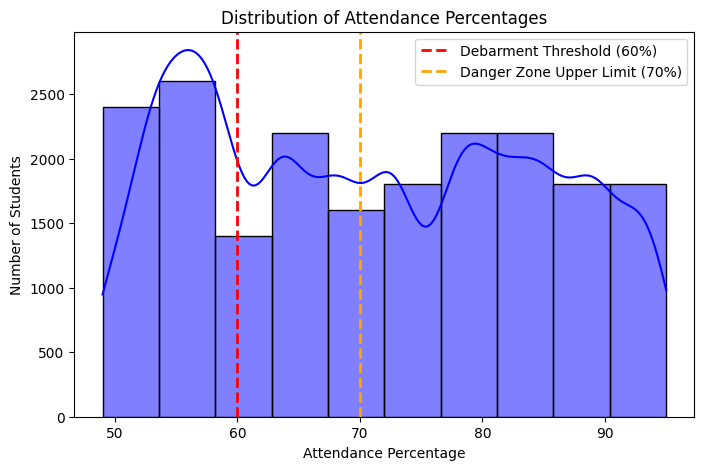

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      1.00      1.00      1616

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



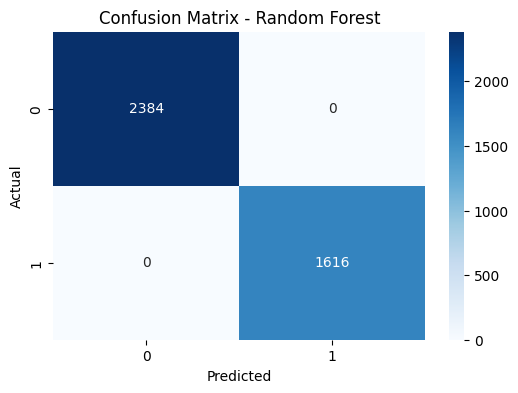

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("std.csv")

# Step 2: Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Step 3: Calculate attendance percentage per student
attendance_summary = df.groupby("Student_ID")["Attendance_Status"].mean().reset_index()
attendance_summary.rename(columns={"Attendance_Status": "Attendance_Percentage"}, inplace=True)

# Step 4: Define Debarment Criteria
threshold = 0.65  # Students below 60% are debarred
danger_zone_min = 0.65  # Students between 60% and 70% get warnings
danger_zone_max = 0.75

# Merge attendance data with the main dataframe
df = df.merge(attendance_summary, on="Student_ID", how="left")

# Assign labels for debarred and danger zone
df["Debarred"] = (df["Attendance_Percentage"] < threshold).astype(int)
df["Danger_Zone"] = ((df["Attendance_Percentage"] >= danger_zone_min) &
                      (df["Attendance_Percentage"] <= danger_zone_max)).astype(int)

# Step 5: Display students in the Danger Zone
at_risk_students = df[["Student_ID", "Attendance_Percentage"]].drop_duplicates()
at_risk_students = at_risk_students[(at_risk_students["Attendance_Percentage"] >= danger_zone_min) &
                                    (at_risk_students["Attendance_Percentage"] <= danger_zone_max)]

if not at_risk_students.empty:
    print("\n⚠️ Warning! The following students are in the danger zone (60%-70% attendance):\n")
    print(at_risk_students.to_string(index=False))
else:
    print("\n✅ No students in the danger zone!\n")

# Step 6: Function to check debarment status for a specific Student ID
def check_student_status(student_id):
    student_id = student_id.strip()  # Remove extra spaces

    # Check if Student_ID exists
    if student_id not in df["Student_ID"].values:
        print(f"⚠️ Student ID '{student_id}' not found!")
        return

    # Get student details
    student_data = df[df["Student_ID"] == student_id][["Student_ID", "Attendance_Percentage", "Debarred"]].drop_duplicates()

    # Display status
    attendance = student_data["Attendance_Percentage"].values[0] * 100
    debarred_status = "Debarred ❌" if student_data["Debarred"].values[0] == 1 else "Not Debarred ✅"

    print(f"\n📌 Student {student_id}: {debarred_status} (Attendance: {attendance:.2f}%)\n")

# Step 7: Get Student ID from user input
student_id_input = input("Enter Student ID: ").strip()
check_student_status(student_id_input)

# Step 8: Visualize Attendance Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Attendance_Percentage"] * 100, bins=10, kde=True, color="blue")
plt.axvline(x=60, color='red', linestyle='dashed', linewidth=2, label="Debarment Threshold (60%)")
plt.axvline(x=70, color='orange', linestyle='dashed', linewidth=2, label="Danger Zone Upper Limit (70%)")
plt.xlabel("Attendance Percentage")
plt.ylabel("Number of Students")
plt.title("Distribution of Attendance Percentages")
plt.legend()
plt.show()

# Step 9: Train a model for Debarment Prediction
X = df[["Attendance_Percentage"]]
y = df["Debarred"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
rf_pred = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()